# node information

In [1]:
import numpy as np
import pandas as pd

In [2]:
node_info = pd.read_csv('data/node_information.csv', header=None)
node_info.columns = ['id', 'year', 'title', 'authors', 'journal', 'abstract']
print(node_info.info())
node_info.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27770 entries, 0 to 27769
Data columns (total 6 columns):
id          27770 non-null int64
year        27770 non-null int64
title       27770 non-null object
authors     23737 non-null object
journal     20298 non-null object
abstract    27770 non-null object
dtypes: int64(2), object(4)
memory usage: 1.3+ MB
None


,id,year,title,authors,journal,abstract
0,1001,2000,compactification geometry and duality,Paul S. Aspinwall,NaN,these are notes based on lectures given at tas...
1,1002,2000,domain walls and massive gauged supergravity p...,"M. Cvetic, H. Lu, C.N. Pope",Class.Quant.Grav.,we point out that massive gauged supergravity ...
2,1003,2000,comment on metric fluctuations in brane worlds,"Y.S. Myung, Gungwon Kang",NaN,recently ivanov and volovich hep-th 9912242 cl...
3,1004,2000,moving mirrors and thermodynamic paradoxes,Adam D. Helfer,Phys.Rev.,quantum fields responding to moving mirrors ha...
4,1005,2000,bundles of chiral blocks and boundary conditio...,"J. Fuchs, C. Schweigert",NaN,proceedings of lie iii clausthal july 1999 var...


In [3]:
authors = node_info['authors']
set(authors)

{nan,
 'K.Stepanyantz',
 'J. X. Lu (U. of Michigan), S. Roy (Saha Institute), H. Singh (Saha',
 'L. Cornalba (U. Amsterdam), Miguel S. Costa (ENS)',
 'P. Berglund, E. Derrick, T. H\\"ubsch, D. Jancic',
 'S.P. de Alwis, Nikolaos Irges',
 'Yu-kui Zhou, Paul A. Pearce',
 'S. S. Gubser, I. R. Klebanov, , A. M. Polyakov',
 "Brian R. Greene, Samir D. Mathur, Christopher M. O'Neill",
 'G. Bimonte, A. Stern, P. Vitale',
 'Akifumi Sako, Toru Sasaki',
 'Oliver Schnetz',
 'R. Vilela Mendes (Grupo de Fisica Matematica, UL, Lisboa)',
 'Vijay Balasubramanian, Petr Horava, , Djordje Minic',
 'Justin R. David, Shiraz Minwalla, Carlos Nunez',
 'Noah Graham, Robert L. Jaffe, Herbert Weigel',
 'A.Y. Shiekh',
 "M. I. Caicedo, A. Restuccia (Universidad Sim\\'on Bol\\'{\\i}var, ",
 'E. Bergshoeff',
 'Curtis G. Callan, Juan M. Maldacena',
 'T.D.Palev, N.I.Stoilova',
 'D. R. Davidson',
 'Silvia Penati, Daniela Zanon',
 'G.A. Diam, is, B.C. Georgalas, E. Papantonopoulos',
 'A. T. Suzuki, A. G. M. Schmidt',
 'M

In [5]:
journals = node_info['journal']
set(journals)
# count_nan = 1. - journals.count() / len(journals)
# count_nan
# len(set(journals))

{'"Black',
 '"Electromagnetic',
 '"New',
 '"Noncommutative',
 '"Problems',
 '"Supersymmetries',
 '"Supersymmetry',
 '"Symmetries',
 '"XIIth',
 '"th',
 "'String",
 'AIP',
 'AMS/IP',
 'Acad.',
 'Acta',
 'Adv.',
 'Adv.Appl.Clifford',
 'Adv.Math.',
 'Adv.Sov.Math.',
 'Adv.Theor.Math.Phys.',
 'Alg.Anal.',
 'Alg.Groups',
 'Am.J.Phys.',
 'Am.Math.Soc.Transl.',
 'An.',
 'Anales',
 'Ann.',
 'Ann.Phys.()-',
 'Ann.Rev.Nucl.Part.Sci.',
 'Annalen',
 'Annales',
 'Annals',
 'Aport.',
 'Astron.Astrophys.',
 'Astropart.Phys.',
 'Astrophys.Space',
 'Atti',
 'Austral.J.Phys.',
 'Banach',
 'Boll.Union.Mat.Ital.',
 'Braz.J.Phys.',
 'Brazilian',
 'Bull.',
 'CCAST-WL',
 'CRM',
 'Calogero-Moser',
 'Can.J.Phys.',
 'Cargese',
 'Causality',
 'Central',
 'Chaos',
 'Chin.',
 'Chin.J.Phys.',
 'Chin.Phys.',
 'Chin.Phys.Lett.',
 'Ciencia',
 'Class.',
 'Class.Quant.Grav.',
 'Class.Quantum',
 'Clifford',
 'Comm.',
 'Comment.',
 'Comments',
 'Commun.',
 'Commun.Anal.Geom.',
 'Commun.Math.Phys.',
 'Commun.Pure',
 'Commun

# training set

## TODO
- distribution of pos/neg samples on each year_diff
- journal names: category seperation

In [3]:
train = pd.read_csv('data/training_set.txt', delimiter=' ', header=None)
train.columns = ['id1', 'id2', 'link']
print(train.info())
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615512 entries, 0 to 615511
Data columns (total 3 columns):
id1     615512 non-null int64
id2     615512 non-null int64
link    615512 non-null int64
dtypes: int64(3)
memory usage: 14.1 MB
None


,id1,id2,link
0,9510123,9502114,1
1,9707075,9604178,1
2,9312155,9506142,0
3,9911255,302165,0
4,9701033,209076,0


In [4]:
train['year1'] = train.apply(lambda row: node_info.loc[node_info['id']==row['id1'], 'year'].values[0], axis=1)
train['year2'] = train.apply(lambda row: node_info.loc[node_info['id']==row['id2'], 'year'].values[0], axis=1)
train['diff_year'] = train.apply(lambda row: row['year1'] - row['year2'], axis=1)
train.head()

NameError: name 'links' is not defined

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
train_grouped = train.groupby(['diff_year', 'link'])['id1'].count().unstack('link').fillna(0).astype('int')
train_grouped

link,0,1
diff_year,,
-11,465,0
-10,2081,6
-9,4208,9
-8,6551,5
-7,8620,20
-6,11416,33
-5,13464,37
-4,16343,62
-3,18796,71


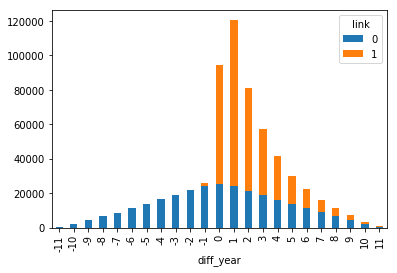

In [32]:
train_grouped.plot(kind='bar', stacked=True)

In [7]:
# year difference
links = train[train['link']==1]
links['year1'] = links.apply(lambda row: node_info.loc[node_info['id']==row['id1'], 'year'].values[0], axis=1)
links['year2'] = links.apply(lambda row: node_info.loc[node_info['id']==row['id2'], 'year'].values[0], axis=1)
links.head()

/home/sven/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/sven/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,id1,id2,link,year1,year2
0,9510123,9502114,1,1995,1995
1,9707075,9604178,1,1997,1996
5,9710020,9709228,1,1997,1997
6,9901042,9510135,1,1999,1995
8,9705079,9702201,1,1997,1997


In [8]:
links['diff_year'] = links.apply(lambda row: row['year1'] - row['year2'], axis=1)
links.head()

/home/sven/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,id1,id2,link,year1,year2,diff_year
0,9510123,9502114,1,1995,1995,0
1,9707075,9604178,1,1997,1996,1
5,9710020,9709228,1,1997,1997,0
6,9901042,9510135,1,1999,1995,4
8,9705079,9702201,1,1997,1997,0


In [39]:
len(links)

335130

In [16]:
node_info.loc[(node_info['id']==103046) | (node_info['id']==6147), :]

,id,year,title,authors,journal,abstract
1376,6147,2002,s 3 skyrmions and the rational map ansatz,Steffen Krusch,Nonlinearity,this paper discusses multi-skyrmions on the 3-...
3514,103046,2001,skyrmions on the two-sphere,"M. de Innocentis, R.S. Ward",NaN,we study static solutions of the skyrme model ...


In [20]:
node_info.loc[node_info['id']==103046, :]['abstract'].values[0]

'we study static solutions of the skyrme model on the two-sphere of radius l for various choices of potential the high-density skyrmion phase corresponds to the ratio beta l size of skyrmion being small whereas the low-density phase corresponds to beta being large the transition between these two phases and in particular the behaviour of a relevant order parameter is examined'

In [39]:
print(sum(train['target']==1), sum(train['target']==0))

335129 280382


In [7]:
print(node_info[node_info['id']==9707075]['year'])
print(node_info[node_info['id']==9604178]['year'])

21154    1997
Name: year, dtype: int64
18059    1996
Name: year, dtype: int64


# test set

In [34]:
test = pd.read_csv('data/testing_set.txt', delimiter=' ', header=None)
test.columns = ['id1', 'id2']
print(test.info())
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 2 columns):
id1    32648 non-null int64
id2    32648 non-null int64
dtypes: int64(2)
memory usage: 510.2 KB
None


,id1,id2
0,9807076,9807139
1,109162,1182
2,9702187,9510135
3,111048,110115
4,9910176,9410073


In [38]:
(len(train) + len(test)) / len(node_info)

23.340223262513504

In [36]:
test['year1'] = test.apply(lambda row: node_info.loc[node_info['id']==row['id1'], 'year'].values[0], axis=1)
test['year2'] = test.apply(lambda row: node_info.loc[node_info['id']==row['id2'], 'year'].values[0], axis=1)
test.head()

,id1,id2,year1,year2
0,9807076,9807139,1998,1998
1,109162,1182,2001,2000
2,9702187,9510135,1997,1995
3,111048,110115,2001,2001
4,9910176,9410073,1999,1994


In [37]:
test['diff_year'] = test.apply(lambda row: row['year1'] - row['year2'], axis=1)
test.head()

,id1,id2,year1,year2,diff_year
0,9807076,9807139,1998,1998,0
1,109162,1182,2001,2000,1
2,9702187,9510135,1997,1995,2
3,111048,110115,2001,2001,0
4,9910176,9410073,1999,1994,5


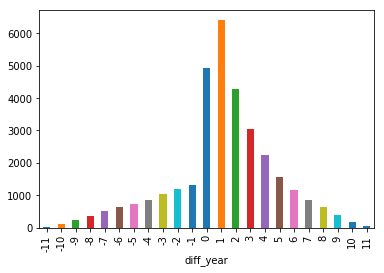

In [41]:
test_grouped = test.groupby(['diff_year'])['id1'].count()
test_grouped.plot(kind='bar')

In [43]:
sub = pd.read_csv('ensemble/ensemble_rf_cit_cn.csv', index_col=0)
sub.head()

,category
id,
0,0
1,1
2,1
3,1
4,0


In [44]:
test = test.join(sub)
test.head()

,id1,id2,year1,year2,diff_year,category
0,9807076,9807139,1998,1998,0,0
1,109162,1182,2001,2000,1,1
2,9702187,9510135,1997,1995,2,1
3,111048,110115,2001,2001,0,1
4,9910176,9410073,1999,1994,5,0


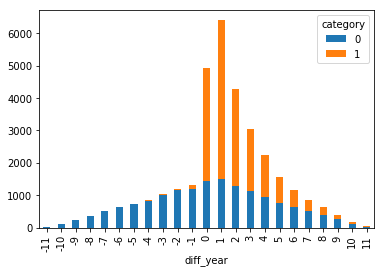

In [45]:
test_grouped = test.groupby(['diff_year', 'category'])['id1'].count().unstack('category')
test_grouped.plot(kind='bar', stacked=True)

In [46]:
test_grouped

category,0,1
diff_year,,
-11,30.0,NaN
-10,119.0,NaN
-9,228.0,1.0
-8,361.0,1.0
-7,496.0,NaN
-6,621.0,3.0
-5,729.0,6.0
-4,831.0,6.0
-3,1012.0,24.0


In [48]:
test['category'] = test.apply(lambda row: 0 if row['diff_year']<=-2 else row['category'], axis=1)

In [51]:
sub = test[['category']]
sub.index.name='id'
sub.head()

,category
id,
0,0
1,1
2,1
3,1
4,0


In [52]:
sub.to_csv('sub_clip_by_diff_year.csv')

In [53]:
links = train[train['link']==1]
nodes = set(set(links['id1']) | set(links['id2']))
len(nodes)

27684

In [55]:
test['category'] = test.apply(lambda row: 1 if row['id1'] not in nodes or row['id2'] not in nodes else row['category'], axis=1)

In [56]:
sub = test[['category']]
sub.index.name='id'
sub.to_csv('sub_clip_by_diff_year_orph_node_1.csv')